# Data analysis project :  Forbes Highest Paid Athletes 1990-2020

## Introduction

In this project, I apply my knowledge of data analysis to explore the Forbes highest-paid athletes between the years 1990 and 2020. The dataset is sourced from Kaggle, and the objective of this project is purely educational, aimed at enhancing my data analysis skills.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# Read in the data
dataframe = pd.read_csv('Dataset/Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')

In [3]:
#We display key information about the dataset 
dataframe.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [5]:
dataframe.shape

(301, 8)

In [6]:
dataframe.describe()

,S.NO,Current Rank,Year,earnings ($ million)
count,301.000000,301.000000,301.000000,301.000000
mean,151.000000,5.448505,2005.122924,45.516279
std,87.035433,2.850995,9.063563,33.525337
min,1.000000,1.000000,1990.000000,8.100000
25%,76.000000,3.000000,1997.000000,24.000000
50%,151.000000,5.000000,2005.000000,39.000000
75%,226.000000,8.000000,2013.000000,59.400000
max,301.000000,10.000000,2020.000000,300.000000


## 1. Data cleaning 

### Handling Missing Values

In [7]:
#We display the sum of Missing Values
dataframe.isna().sum()

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

In [8]:
#Display all rows with NaN values
dataframe[dataframe.isna().any(axis=1)]

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
5,6,Jack Nicklaus,USA,6,NaN,golf,1990,8.6
6,7,Greg Norman,Australia,7,NaN,golf,1990,8.5
7,8,Michael Jordan,USA,8,NaN,basketball,1990,8.1
8,9,Arnold Palmer,USA,8,NaN,golf,1990,8.1
9,10,Evander Holyfield,USA,8,NaN,boxing,1990,8.1


The 'Previous Year Rank' column is not pertinent to the analysis of the highest-paid athletes, so it can be safely removed to streamline the dataset.

In [9]:
#We delete the columns 
dataframe.drop("Previous Year Rank", axis=1, inplace=True)

In [10]:
dataframe.columns

Index(['S.NO', 'Name', 'Nationality', 'Current Rank', 'Sport', 'Year',
       'earnings ($ million)'],
      dtype='object')

### Data Type Correction

In [11]:
#Display all columns types
dataframe.dtypes

S.NO                      int64
Name                     object
Nationality              object
Current Rank              int64
Sport                    object
Year                      int64
earnings ($ million)    float64
dtype: object

In [12]:
#Display the memory usage
dataframe.memory_usage().sum()

16988

In [13]:
#Transform columns to date types
dataframe["Year"] = pd.to_datetime(dataframe['Year'], format='%Y')

### Outlier Detection

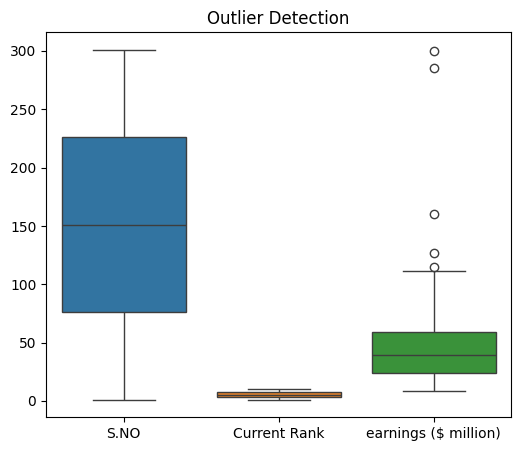

In [14]:
#Create a boxplot to visualize outliers in numeric columns.
plt.figure(figsize=(6, 5))  # Ajustez la hauteur ici
sns.boxplot(data=dataframe)
plt.title("Outlier Detection")
plt.show()

Even if the current rankings don't display well in the boxplot, we can only see outliers in the earnings. Let's refine the analysis a bit to determine whether the data remains consistent or if there are errors.

In [15]:
#Calculate IQR 

In [17]:
Q3 = dataframe['earnings ($ million)'].quantile(0.75)
Q1 = dataframe['earnings ($ million)'].quantile(0.25)
IQR = Q3 - Q1

In [18]:
upper_outliers = Q3 + 1.5 * IQR

In [19]:
#Display upper outlier range
outliers_earnings = dataframe[dataframe['earnings ($ million)'] > upper_outliers]

In [20]:
outliers_earnings

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
171,172,Tiger Woods,USA,1,golf,2008-01-01,115.0
241,242,Floyd Mayweather,USA,1,Boxing,2015-01-01,300.0
242,243,Manny Pacquiao,Philippines,2,Boxing,2015-01-01,160.0
271,272,Floyd Mayweather,USA,1,Boxing,2018-01-01,285.0
281,282,Lionel Messi,Argentina,1,Soccer,2019-01-01,127.0


So we can see that there is no error; these people earn this amount of money, so we can keep this row in our dataset.

### Remove Duplicates

In [21]:
#Display duplicates rox
duplicates = dataframe[dataframe.duplicated(subset='S.NO', keep=False)]

In [22]:
duplicates

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)


There are no duplicate rows in the dataset.

## 2. Exploratory Data Analysis (EDA)

## Project Objective

The aim of this project is to analyze the data on the highest-paid athletes according to Forbes from 1990 to 2020. The analysis will address the following key questions:

---

### 1. Top 5 Highest Paid Athletes of All Time
We will identify the five athletes who have accumulated the highest earnings.

---

### 2. Top 5 Sports with the Highest Earnings
Which five sports generate the most revenue for their athletes?

---

### 3. Top 5 Nationalities with the Highest Earnings
What are the fivetop_paid_athletes = earnings_by_athlete.nlargest(3, 'earnings ($ million)')◊ nationalities that dominate the rankings in terms of athlete earnings?

---

### 4. The Year with the Top 10 Highest Earnings
Which year saw the most athletes in the Top 10 of highest earnings?

---

### 5. Correlation between a Specific Sport and Winning Amount
We will examine whether there is a correlation between practicing a specific sport and the earnings of athletes.

---

### 6. Correlation between Years and Earnings Growth
This analysis will explore the relationship between years and the growth of earnings over time.

In [23]:
# Display summary statistics
dataframe.describe()

,S.NO,Current Rank,Year,earnings ($ million)
count,301.000000,301.000000,301,301.000000
mean,151.000000,5.448505,2005-02-14 11:57:36.478405376,45.516279
min,1.000000,1.000000,1990-01-01 00:00:00,8.100000
25%,76.000000,3.000000,1997-01-01 00:00:00,24.000000
50%,151.000000,5.000000,2005-01-01 00:00:00,39.000000
75%,226.000000,8.000000,2013-01-01 00:00:00,59.400000
max,301.000000,10.000000,2020-01-01 00:00:00,300.000000
std,87.035433,2.850995,NaN,33.525337


### 1.Top 5 Highest Paid Athletes of All Time

In [52]:
# Display the top 5 highest paid athletes
earnings_by_athlete = dataframe.groupby('Name')['earnings ($ million)'].sum().reset_index()

In [49]:
top5_paid_athletes = earnings_by_athlete.nlargest(5, 'earnings ($ million)')

In [51]:
top5_paid_athletes.reset_index()

,index,Name,earnings ($ million)
0,78,Tiger Woods,1373.8
1,45,LeBron James,844.8
2,25,Floyd Mayweather,840.0
3,14,Cristiano Ronaldo,787.1
4,68,Roger Federer,781.1


<Axes: >

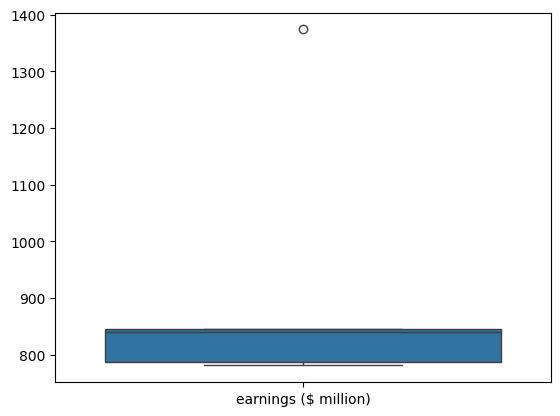

In [54]:
sns.boxplot(data=top5_paid_athletes)

If we look at the box plot, we can see that Tiger Woods' earnings are considered an outlier.

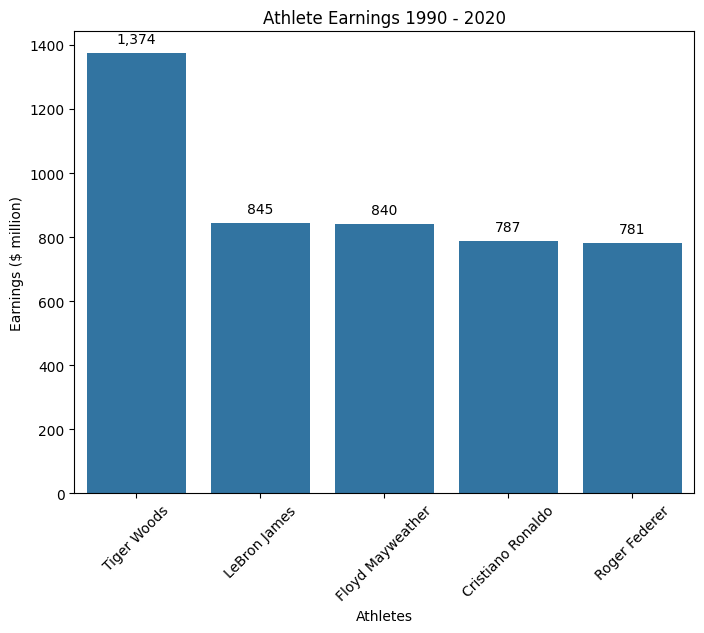

In [67]:
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(data=top5_paid_athletes, x="Name", y="earnings ($ million)")
plt.xticks(rotation=45)
plt.title("Athlete Earnings 1990 - 2020")
plt.xlabel("Athletes")
plt.ylabel("Earnings ($ million)")
# Annotate each bar with the value
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():,.0f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', 
                      va='bottom', 
                      fontsize=10, 
                      color='black', 
                      xytext=(0, 5),  # Offset text slightly above the bar
                      textcoords='offset points')



### 2. Top 5 Sports with the Highest Earnings